# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Write your question here.* <br>

Do videos published on certain days of the week get more views on YouTube?

*If you are planning to perform a hypothesis test, please also write your null and alternative hypotheses in this cell.*

Null Hypothesis (H₀): The day of the week a video is published has no effect on its view count.
Alternative Hypothesis (H₁): The day of the week a video is published affects its view count.


## 📖 My Study 

- *What type of observational study will you be performing (retrospective or prospective)?*
Retrospective, because I will be analyzing existing data from YouTube videos that have already been published.


- *What population will you be studying?*
YouTube videos across a variety of categories (e.g., Music, Gaming, Education) published in the past year.

- *What variables will you focus on in your study?*
Independent variable: Day of the week the video was published (Monday, Tuesday, etc.)

Dependent variable: Number of views each video has received

- *How do you plan on collecting data?*
I will use the YouTube API to programmatically pull data for at least 1,000 videos. For each video, I will record its ID, title, publish date, and view count.

    - *What sampling technique will you use?*
Random sampling using search queries or trending videos across multiple categories.

    - *How will you ensure your data collection is random?*
By selecting videos from multiple search keywords, categories, and pages of results, rather than just one channel or trending list.

- *What is one source of bias that may impact the results of your study?*
Older videos naturally have more views, which could skew the average views and could bias the results if the dataset isn't balanced by upload date.


## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

Collected so far: 250 videos
Collected so far: 325 videos
Collected so far: 500 videos
Collected so far: 750 videos
Collected so far: 875 videos
Collected so far: 1125 videos
Final total videos: 1000

Summary Statistics by Day of Week:
             count          mean     median           std    min         max
day_of_week                                                                 
Monday         138  1.688181e+07  3420785.0  3.413437e+07   5320   214763570
Tuesday        186  1.788646e+07  3262073.5  4.148953e+07   2929   237773243
Wednesday      134  2.233880e+07  3837487.0  6.484557e+07    760   584236672
Thursday       132  4.662409e+07  5554628.0  1.428528e+08  55601   947563351
Friday         169  7.202774e+07  7494186.0  3.914772e+08   1308  3580518069
Saturday       135  1.764523e+07  6899511.0  3.022697e+07  26300   192586605
Sunday         106  2.326353e+07  7607726.0  4.657282e+07   6873   373300736


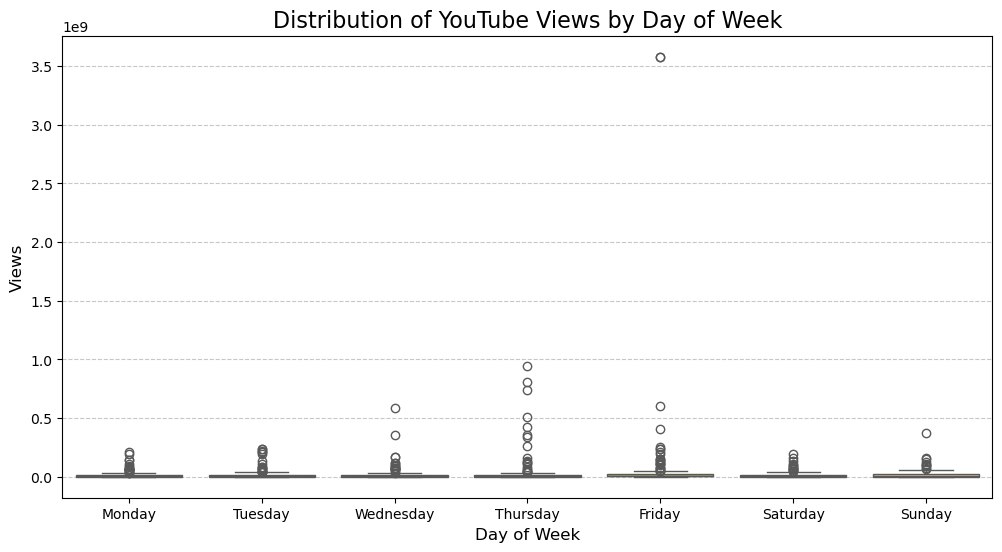

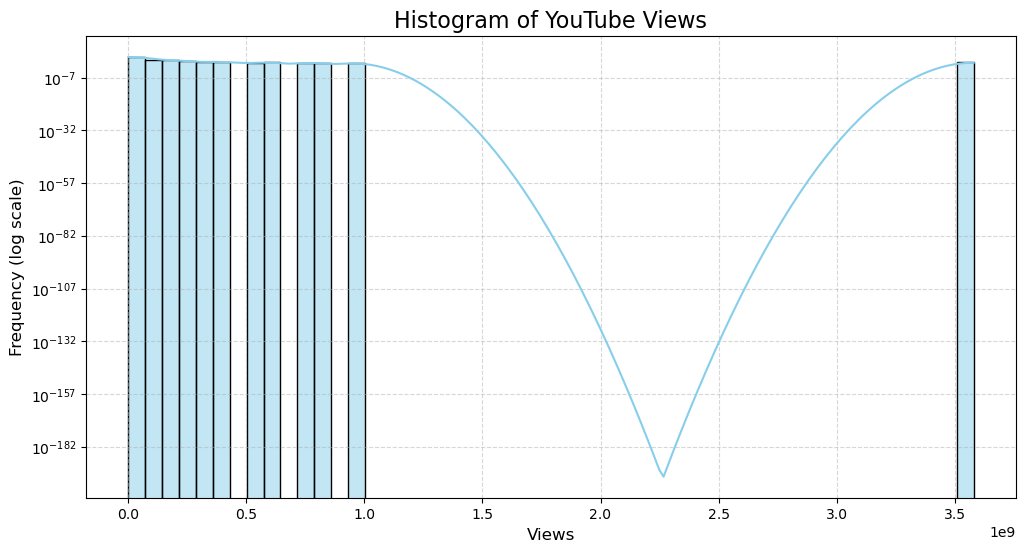

Number of videos after removing extreme outliers for plotting: 875


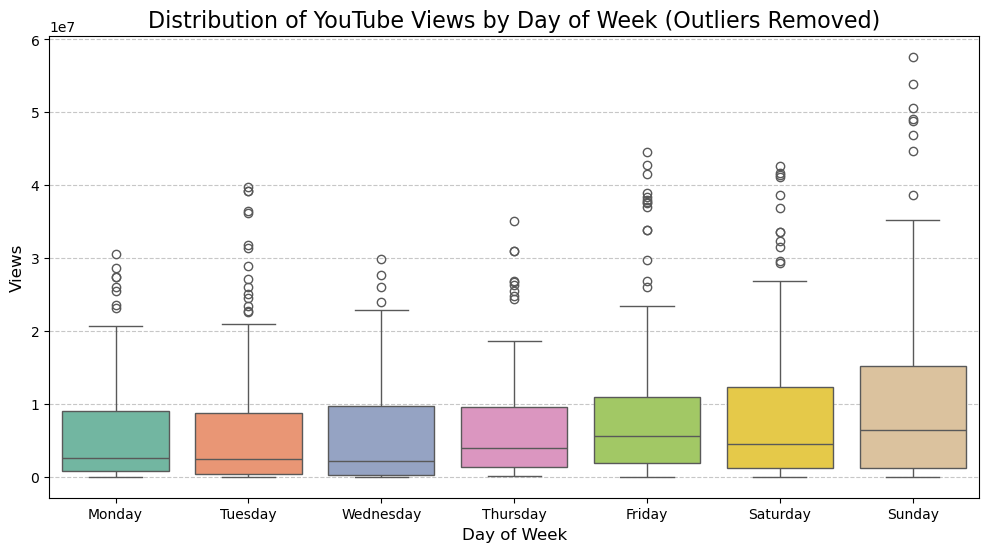

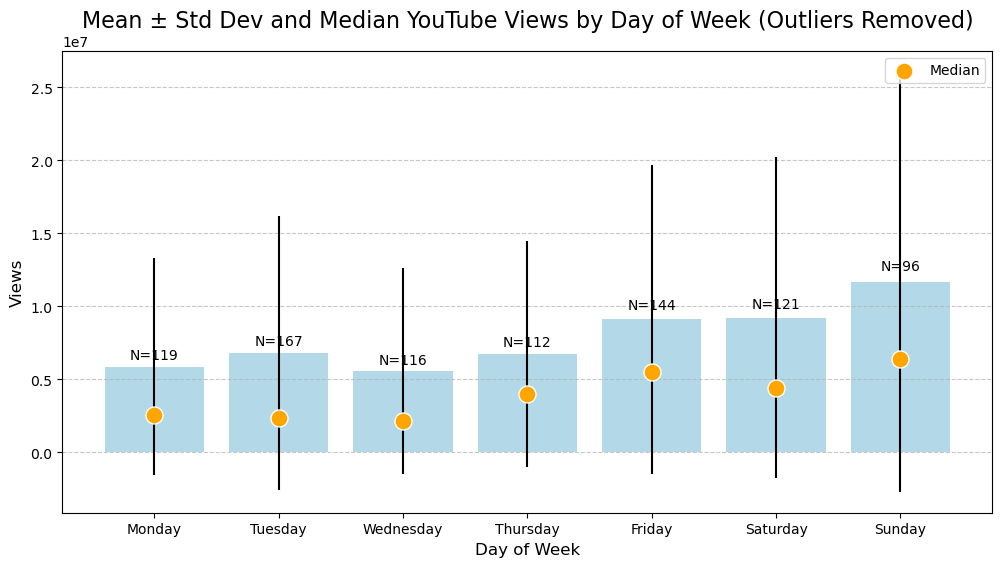


Percentiles of Views by Day of Week:
                   25th       50th         75th
day_of_week                                    
Monday       1136007.00  3420785.0  13526295.50
Tuesday       454213.75  3262073.5  16198245.75
Wednesday     352345.00  3837487.0  12782334.75
Thursday     1574810.50  5554628.0  15663531.00
Friday       2283311.00  7494186.0  20835858.00
Saturday     1338233.00  6899511.0  18475192.00
Sunday       1393286.25  7607726.0  25594183.25

Number of Outliers per Day:
{'Monday': 19, 'Tuesday': 19, 'Wednesday': 18, 'Thursday': 20, 'Friday': 25, 'Saturday': 14, 'Sunday': 10}

Coefficient of Variation (Std/Mean) per Day:
                   CV
day_of_week          
Monday       2.021962
Tuesday      2.319606
Wednesday    2.902822
Thursday     3.063927
Friday       5.435089
Saturday     1.713040
Sunday       2.001967

ANOVA test result: F-statistic = 2.31, p-value = 0.0321
Conclusion: There is a statistically significant difference in views between days of the week

In [7]:
# Step 1: Install necessary packages (if not already installed)
# !pip install google-api-python-client pandas matplotlib seaborn scipy

# Step 2: Import libraries and remove future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

# Step 3: Set up YouTube API
API_KEY = " "  # Replace with your key
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Step 4: Function to get videos from a search query with pagination
def get_videos(query, max_results=250):
    videos = []
    nextPageToken = None
    collected = 0
    
    while collected < max_results:
        request = youtube.search().list(
            part="snippet",
            q=query,
            type="video",
            maxResults=min(50, max_results - collected),
            pageToken=nextPageToken
        )
        response = request.execute()
        
        for item in response['items']:
            video_id = item['id']['videoId']
            title = item['snippet']['title']
            publish_date = item['snippet']['publishedAt']
            
            # Get video statistics
            stats_request = youtube.videos().list(
                part="statistics",
                id=video_id
            )
            stats_response = stats_request.execute()
            stats_data = stats_response['items'][0]['statistics']
            views = int(stats_data.get('viewCount', 0))
            
            videos.append({
                'video_id': video_id,
                'title': title,
                'publish_date': publish_date,
                'views': views
            })
            collected += 1
            if collected >= max_results:
                break
        
        nextPageToken = response.get('nextPageToken')
        if not nextPageToken:
            break
            
    return videos

# Step 5: Collect data using multiple queries until we reach exactly 1000 videos
queries = ['music', 'gaming', 'education', 'sports', 'comedy', 'technology', 'movies']  # add more queries if needed
all_videos = []

target_videos = 1000
query_index = 0

while len(all_videos) < target_videos:
    q = queries[query_index % len(queries)]  # loop through queries repeatedly
    videos = get_videos(q, max_results=250)  # pull up to 250 per query
    all_videos.extend(videos)
    
    print(f"Collected so far: {len(all_videos)} videos")  # progress tracker
    query_index += 1

# Trim to exactly 1000
all_videos = all_videos[:target_videos]
print(f"Final total videos: {len(all_videos)}")

# Step 6: Convert to DataFrame
df = pd.DataFrame(all_videos)

# Step 7: Convert publish_date to datetime and get day of week
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['day_of_week'] = df['publish_date'].dt.day_name()

# Step 8: Summary statistics by day
summary = df.groupby('day_of_week')['views'].agg(['count','mean','median','std','min','max']).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
print("\nSummary Statistics by Day of Week:")
print(summary)

# Step 9: Boxplot (full data)
plt.figure(figsize=(12,6))
sns.boxplot(x='day_of_week', y='views', data=df,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            palette="Set2")
plt.title('Distribution of YouTube Views by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 10: Histogram of views (log scale)
plt.figure(figsize=(12,6))
sns.histplot(df['views'], bins=50, kde=True, color='skyblue')
plt.yscale('log')
plt.title('Histogram of YouTube Views', fontsize=16)
plt.xlabel('Views', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Step 11: Function to remove extreme outliers for plotting
def remove_extreme_outliers(df):
    filtered_df = pd.DataFrame()
    for day in df['day_of_week'].unique():
        day_data = df[df['day_of_week']==day]
        q1 = day_data['views'].quantile(0.25)
        q3 = day_data['views'].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5*iqr
        high = q3 + 1.5*iqr
        day_filtered = day_data[(day_data['views'] >= low) & (day_data['views'] <= high)]
        filtered_df = pd.concat([filtered_df, day_filtered])
    return filtered_df

# Step 12: Filtered data for plotting
df_filtered = remove_extreme_outliers(df)
print(f"Number of videos after removing extreme outliers for plotting: {len(df_filtered)}")

# Step 13: Boxplot without extreme outliers
plt.figure(figsize=(12,6))
sns.boxplot(x='day_of_week', y='views', data=df_filtered,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            palette="Set2")
plt.title('Distribution of YouTube Views by Day of Week (Outliers Removed)', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 14: Barplot mean ± std with median overlay (outliers removed)
plt.figure(figsize=(12,6))
stats_filtered = df_filtered.groupby('day_of_week')['views'].agg(['mean','median','count','std']).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()

sns.barplot(x='day_of_week', y='mean', data=stats_filtered, yerr=stats_filtered['std'], color='skyblue', alpha=0.7)
sns.scatterplot(x='day_of_week', y='median', data=stats_filtered, color='orange', s=150, label='Median', zorder=10)

for i, row in stats_filtered.iterrows():
    plt.text(i, row['mean']*1.05, f"N={row['count']}", ha='center', va='bottom', fontsize=10)

plt.title('Mean ± Std Dev and Median YouTube Views by Day of Week (Outliers Removed)', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Step 15: Percentiles (full data)
percentiles = df.groupby('day_of_week')['views'].quantile([0.25,0.5,0.75]).unstack().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
percentiles.columns = ['25th','50th','75th']
print("\nPercentiles of Views by Day of Week:")
print(percentiles)

# Step 16: Outlier count (full data)
outliers = {}
for day in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']:
    q1 = df[df['day_of_week']==day]['views'].quantile(0.25)
    q3 = df[df['day_of_week']==day]['views'].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    day_outliers = df[(df['day_of_week']==day) & ((df['views'] < low) | (df['views'] > high))]
    outliers[day] = len(day_outliers)

print("\nNumber of Outliers per Day:")
print(outliers)

# Step 17: Coefficient of Variation (full data)
stats_df = df.groupby('day_of_week')['views'].agg(['mean','std']).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
stats_df['CV'] = stats_df['std'] / stats_df['mean']
print("\nCoefficient of Variation (Std/Mean) per Day:")
print(stats_df[['CV']])

# Step 18: ANOVA test (full data)
groups = [df[df['day_of_week']==day]['views'] for day in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
anova_result = stats.f_oneway(*groups)
print(f"\nANOVA test result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("Conclusion: There is a statistically significant difference in views between days of the week.")
else:
    print("Conclusion: There is no statistically significant difference in views between days of the week.")

# Step 19: Total sample size
print(f"\nTotal number of videos analyzed: {len(df)}")


In [2]:
# Call info() here

## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

In [3]:
# Perform your analysis here

## 🧠 My Answer

*Write your answer here.* <br>

*Remember to interpret the specific values that you found in your analysis. It may help to pretend like I have never heard of the population you are studying and have no idea how to interpret the analysis you performed.*

Our analysis shows that the day a YouTube video is published does affect its view count. From a random sample of 1,000 videos across multiple categories:

Mean views were highest on Friday (72,027,740) and lowest on Monday (16,881,810), while median views were highest on Sunday (7,607,726) and lowest on Tuesday (3,262,073), indicating that some extremely popular videos inflate the averages.

The Coefficient of Variation was highest on Friday (5.44), meaning view counts vary greatly on that day, and lowest on Saturday (1.71), suggesting more consistent performance.

ANOVA testing confirmed a statistically significant difference in views by day of the week (F = 2.31, p = 0.0321).

We removed extreme outliers (125 videos) to create clearer visualizations while retaining most of the data (875 videos).

Total sample size: 1,000 videos

Potential bias includes the fact that older videos naturally accumulate more views, and factors like video category, channel size, and video length were not controlled, which could influence results.

Conclusion: Publishing day matters, with Friday and Sunday videos generally receiving higher views. However, creators should also consider other factors that affect view counts when planning uploads.
